# Commentaire de l'article


The paper "Beta and return" explores the concept of beta and its relationship to investment returns. In the first part, the author argues that Fama misinterpreted the results of Fama and French's 1992 article on the relationship between average return and risk. Fama and French found that the estimated slope of the line relating average return and risk is lower than the slope predicted by the capital asset pricing model (CAPM), and the author agrees with this finding. However, Fama and French claim to have found evidence against the Sharpe-Lintner-Black (SLB) model, which predicts a positive slope of the line, but the author believes their results are consistent with the SLB model. The author also suggests that a flat line implies investment opportunities for those who use beta, as low-beta stocks may do better than expected returns under the CAPM. The author argues that beta is a valuable investment tool regardless of how steep the line is.

The content of the second part is the problem of data mining in research, where researchers try many different combinations of explanatory factors and models and only report the more successful results, leading to biased statistical analysis. This problem is especially severe in the field of investments, where thousands of researchers are looking for profit opportunities in securities and may inadvertently engage in data mining. The article cites the example of the "size effect," where researchers have found inconsistent results on the relation between firm size and stock returns, and warns that lack of theory is a red flag for data mining. Additionally, the article notes that Fama and French have found that the ratio of book market to the market value of a firm's equity can help capture cross-sectional variation in average stock returns.

Third, the article discusses the construction of the beta factor, which is achieved by creating a diversified portfolio that is long in low-beta stocks and short in smaller amounts of high-beta stocks. This results in a beta that is roughly zero. The beta factor shows stronger evidence of extra returns compared to the small-beta stock or book-to-market equity factor. Borrowing restrictions may cause low-beta stocks to have higher expected returns than the CAPM predicts, which could explain the higher expected returns of the beta factor. The article suggests that mismeasurement of the market portfolio could also be a possible reason for beta factor pricing. However, the article notes that it is difficult to test which of these theoretical factors is most important due to the lack of independent observations in stock returns and the risk of data mining. The article concludes that the portfolio method used in the BJS study is simple and intuitive, and while other methods have been proposed, they may not add enough accuracy to warrant their complexity.

Conclusion, the author discusses their preference for the "portfolio method" used in the BJS (Black, Jensen, and Scholes) study on beta and investment returns. They argue that this method is simple and intuitive, and can simulate a portfolio strategy that an investor can actually use. The portfolio selection method can incorporate any cross-sectional effects that the researchers believe are important and can use any data available to investors at the start of each year. However, the author acknowledges that the more complex the portfolio selection method, the greater the risk of introducing a data mining bias.

To minimize the data mining problem, the BJS study used a simple portfolio strategy that chose securities based on historical estimates of beta and used many securities to diversify out the factors not related to beta. However, the author notes that beta is highly correlated with both total risk and residual risk across stocks, so what they call the "beta factor" may be better referred to as the "total risk factor" or the "residual risk factor." The author admits that they could not think of a reliable way to distinguish among these factors.

The author then discusses their consideration of estimating the entire covariance matrix for the population of stocks in the BJS study. While this could improve the efficiency of the test, the potential for error in their econometric methods was high, so they did not pursue that route. Other researchers have used different methods to update the BJS study, but the author believes that in the presence of data mining, estimate error, and changing risk premiums, none of these methods adds enough accuracy to warrant their complexity. The author views most of these methods as simply expressing the BJS method in different language.

Overall, the "Beta and return" article is a useful resource for investors looking to better understand how to measure the risk and return of an investment portfolio. By using beta and other measures, investors can construct a diversified portfolio that maximizes return while minimizing risk.



# Debut de notre code

On commence par importer et transformer les données pour obtenir un dataframe propre et manipulable.

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
os.chdir("D:/3.Cours EK/8. SEMESTRE DEUX/3. ALLOC MULTI ASSET - Attali/Projet alloc")

In [3]:
df = pd.read_csv("sp.csv", sep=";")

## Transformation de l'excel
On cherche à obtenir un dataframe facilement manipulable.

In [4]:
def pretraitement(df):
    #columns names
    index_names = [x for x in df.columns if "Unnamed" not in x]
    
    # Take out NaN
    for c in df.columns:
        if df[c].dtype == float:
            del df[c]

    # Taking care of dates
    df.index = df.iloc[:,0]
    for c in df.columns:
        if df[c].iloc[0] == "Date":
            del df[c]

    df.columns = index_names #renaming columns
    df = df.iloc[1:,:] #take out first line
    df.index.names = ['Date'] #index name
    df = df.apply(lambda x: x.str.replace(',','.')) #change problems of format
    df = df.astype(float) #change dtype
    return df

In [5]:
df = pretraitement(df)
df.head()

,SPX Index,S5SFTW Index,S5PHRM Index,S5CPGS Index,S5ENRSX Index,S5FDBT Index,S5TECH Index,S5RETL Index,S5BANKX Index,S5HCES Index,...,S5MATRX Index,S5INSU Index,S5FDSR Index,S5HOUS Index,S5SSEQX Index,S5TRAN Index,S5HOTR Index,S5CODU Index,S5AUCO Index,S5COMS Index
Date,,,,,,,,,,,,,,,,,,,,,
25/09/1989,344.23,51.29,63.49,68.23,82.27,57.95,77.09,66.20,89.06,76.15,...,78.32,76.65,72.06,48.77,28.05,88.05,71.41,77.35,85.75,94.63
26/09/1989,344.33,51.03,63.38,68.25,81.64,58.19,77.45,66.51,88.97,76.01,...,78.05,77.28,72.28,48.69,28.24,87.45,71.58,77.32,86.60,94.75
27/09/1989,345.10,51.29,64.51,68.46,81.69,58.74,75.28,66.93,89.44,76.29,...,78.15,77.78,72.40,48.60,28.06,87.51,71.85,77.65,86.22,96.55
28/09/1989,348.60,52.28,65.97,68.95,82.13,60.26,74.32,67.65,91.46,77.32,...,78.55,78.84,73.47,49.35,28.29,88.69,72.94,78.31,86.33,98.86
29/09/1989,349.15,52.20,65.97,68.87,82.42,60.52,74.29,67.52,92.05,77.54,...,78.80,80.34,73.61,49.22,28.30,89.27,72.39,78.07,85.26,98.48


On obtient ce dataframe qui contient le prix pour chaque date et chaque index.

## Première analyse
On effectue une première analyse en experimentant avec quelques fonctions pour analyser notre dataframe.
On commence par observer les rendements quotidiens des indices.

In [6]:
df0  = np.log1p(df.pct_change()) #log returns

On regarde la correlation de chaque indice avec le SPX avec la fonction suivante :

In [7]:
def make_corr(df, single_df):
    """
    Function to compute correlation between a 1-column dataframe 'single_df' and another dataframe 'df'.
    Return correlation vector.
    """
    cor = pd.DataFrame(index=["correlation"])
    for col in df.columns:
        cor[col] = single_df.corr(df[col])
    return cor.T

In [8]:
spx, indx = df0["SPX Index"], df0.drop(columns = ["SPX Index"])
corr = make_corr(indx, spx)
corr.T

,S5SFTW Index,S5PHRM Index,S5CPGS Index,S5ENRSX Index,S5FDBT Index,S5TECH Index,S5RETL Index,S5BANKX Index,S5HCES Index,S5DIVF Index,...,S5MATRX Index,S5INSU Index,S5FDSR Index,S5HOUS Index,S5SSEQX Index,S5TRAN Index,S5HOTR Index,S5CODU Index,S5AUCO Index,S5COMS Index
correlation,0.770154,0.711584,0.900095,0.6882,0.687648,0.772831,0.787067,0.75078,0.73222,0.85019,...,0.795411,0.818087,0.665585,0.597667,0.688937,0.755474,0.735847,0.801972,0.7243,0.833353


On regarde maintenant le ratio de standard deviation entre un indice et le SPX.

In [9]:
tmp = df0.std()
std_spx, std_indx = tmp[0], tmp[1:]
std_ratio = pd.DataFrame(std_indx / std_spx)
std_ratio.columns = ["ratio"]
std_ratio.T

,S5SFTW Index,S5PHRM Index,S5CPGS Index,S5ENRSX Index,S5FDBT Index,S5TECH Index,S5RETL Index,S5BANKX Index,S5HCES Index,S5DIVF Index,...,S5MATRX Index,S5INSU Index,S5FDSR Index,S5HOUS Index,S5SSEQX Index,S5TRAN Index,S5HOTR Index,S5CODU Index,S5AUCO Index,S5COMS Index
ratio,1.537646,1.111806,1.149401,1.331544,0.888281,1.589616,1.350834,1.762973,1.060641,1.743895,...,1.242007,1.418951,1.008714,1.036891,1.98191,1.214816,1.16534,1.184548,1.619968,1.084028


On met en place la formule du beta et on fait un premier test sur nos indices.

In [10]:
betas = pd.DataFrame(corr["correlation"] * std_ratio['ratio'])
betas.columns = ["betas"]

# 10 min betas, et 10 max betas 
mn_betas = betas.sort_values(by=["betas"],ascending=True).iloc[:10,]
mx_betas = betas.sort_values(by=["betas"],ascending=False).iloc[:10,]

pd.DataFrame(mn_betas.T)
#pd.DataFrame(mx_betas.T)

,S5UTILX Index,S5FDBT Index,S5HOUS Index,S5FDSR Index,S5HCES Index,S5PHRM Index,S5TELSX Index,S5HOTR Index,S5COMS Index,S5ENRSX Index
betas,0.599157,0.610824,0.619715,0.671385,0.776622,0.791144,0.854648,0.857512,0.903379,0.916369


On fait une représentation rapide des betas. On note qu'ici ils sont calculés avec l'ensemble des données. Ce ne sera pas le cas pour la mise en place de la stratégie. Cette section sert juste à montrer l'utilisation de quelques fonctions.

Text(0.5, 1.0, 'betas')

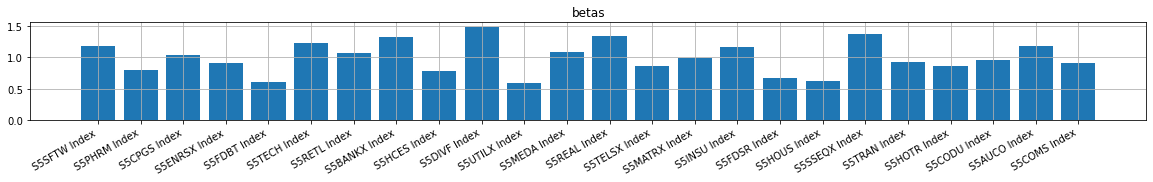

In [11]:
plt.rcParams["figure.figsize"] = (20,2)
plt.bar(betas.index, betas["betas"])
plt.grid()
plt.gcf().autofmt_xdate()
plt.title("betas")

On va également regarder la matrice de corrélatin des indices :

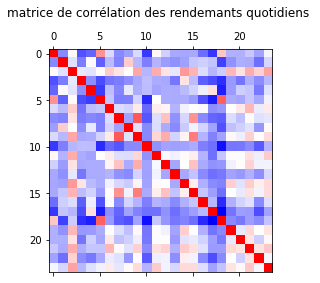

In [12]:
# Compute correlation matrix
cov_matrix = indx.corr()

# Show the matrix
def show_mat(cov_matrix):
    plt.matshow(cov_matrix, cmap='bwr')
    plt.title("matrice de corrélation des rendemants quotidiens \n")
show_mat(cov_matrix)

# Mise en place des fonctions pour la stratégie minmax beta.
**Quels temporalité pour le calculs des betas ?**  
 On choisit de calculer les betas avec le SPX sur les trois derniers mois avec la date de rebalancement du portfeuille. On choisit donc de donner une grande préférence au présent en 'oubliant' les relations des indices et du SPX au dela de 3 mois.
 Une autre idée que l'on pourrait mettre en place serait d'utiliser un 'forgetting' factor, qui utilise l'ensemble des données disponibles (de la date de rebalancement au début des données) mais en appliquant un poids aux données afin de privilieger d'avantage le présent au passé. Ce paramètre (lambda) doit être adapté afin de determiner à quel point on souhaite privilegier le présent sur le passé (faible lambda, proche de 0.9), ou au contraite à quel point prendre en compte le passé dans le calcul (fort lambda, proche de 1).

On commence par récuperer l'ensemble des dates de rebalancement afin de calculer l'état de notre portfeuille à chacun de ces instants (et non à chacune des dates ce qui serait inutiles, car les delta de portfeuille seraient inchangés pendant 3 mois).

In [13]:
from datetime import datetime, timedelta
dates = df.index.values #all the dates from the dataframe

On crée une focntion qui va créer un dataframe (tableau) notre portfeuille, qui contiendra :  
   1) le cash disponible,   
   2) les deltas de chaque indices (combien on a en portfeuille de chaque indice, nombre entier),   
   3) la valeur totale du portfeuille (cash + valeur des indices possedés),   
    
Comme ce portfeuille est crée grâce aux dates de rebalancement, il sera facile de réiterer notre opération en changeant la fréquence de rebalancement, dans le cas où on oudrait tester l'influence de ce paramètre.

In [14]:
def create_portfolio(dates, freq:int=60, only_spx=False):
    """
    Create a portfolio dataframe, rebalance every 'freq' days.
    Option to only carry SPX index if 'only_spx' is True.
    """
    rebalance_days = dates[::freq]
    if only_spx :
        cols = ["Tot value","Cash", "SPX"]
    else:
        cols = ["Tot value","Cash"] + list(df.columns)
    portfolio = pd.DataFrame(index = rebalance_days, columns = cols, data=0)
    return portfolio

On écrit quelques focntions pour la suite, qui correspondent aux opérations que l'on a fait dans la section précédante (calcule de correlation, de ratio de std, et de betas).

In [15]:
def make_corr(df, spx):
    """ 
    Function to compute correlation between indexes and SPX.
    """
    cor = pd.DataFrame(index=["correlation"])
    for col in df.columns:
        cor[col] = spx.corr(df[col])
    return cor.T

def get_ratio(df):
    """ 
    Function to get std ration bewteen indexes and SPX.
    """
    tmp = df.std()
    std_spx, std_indx = tmp[0], tmp[1:]
    std_ratio =  pd.DataFrame(std_indx / std_spx)
    std_ratio.columns = ["ratio"]
    return std_ratio

def compute_beta(corr, ratio):
    """ 
    Function to compute the betas of indexes for SPX as reference.
    """
    betas = pd.DataFrame(corr["correlation"] * ratio['ratio'])
    betas.columns = ["betas"]
    return betas

On écrit une focntion générale pour le calculs des meilleurs indices à selectionner selon leur betas et la stratégie min ou max betas.

In [16]:
def get_betas(df, strat:str="min"):
    """
    Will return the best indexes to choose with regards of beta with spx.
    Depends on the stratégy specified : min or max -> min or max betas.
    """
    #log returns
    tmp  = np.log1p(df.pct_change())
    
    # Get correlation, and ratio
    spx, indx = tmp["SPX Index"], tmp.drop(columns = ["SPX Index"])
    corr, ratio = make_corr(indx, spx), get_ratio(tmp)
    betas = compute_beta(corr, ratio)
    
    # Get 10 min or max beta-indexes
    if strat=="min":
        out = betas.sort_values(by=["betas"],ascending=True).iloc[:10,]
    elif strat=="max":
        out = betas.sort_values(by=["betas"],ascending=False).iloc[:10,]
    else:
        return "Wrong strat mode. Input must be 'min' or 'max'."
    
    #print(betas.index.values, "\n", betas["betas"].values)
    return out.index.values, out["betas"].values

## Stratégie pour min max beta
On met en place la fonction qui va gerer le rebalancement et la selection des betas à chaque date de rebalancement.

In [17]:
def run_strat(df, portfolio, cash:float=500, strat:str="min"):
    if portfolio.iloc[0,].sum() != 0:
        return "Portfolio not empty"
    if strat not in ["min" , "max"] :
        return "Wrong strat mode. Must be min or max."
    days = portfolio.index.values
    
    #Initialisation
    portfolio.iloc[0,1] = cash
    portfolio.iloc[0,0] = portfolio.iloc[0,1:].sum()

    #Iteration on every rebalancing day
    for d0, d1 in zip(days[:-1], days[1:]):

        #get yersteday's data, the day before d1 (day of rebalancing) ========
        found_yersteday, j = False, 1
        while not found_yersteday :
            try :
                yesterday = datetime.strptime(d1,'%d/%m/%Y')- timedelta(days=j)
                dy_price = df.loc[yesterday.strftime('%d/%m/%Y'),:]
                found_yersteday = True
            except:
                j+=1
        
        #Computing available cash value available
        d0_port = portfolio.loc[d0,:]     
        available_cash = d0_port["Cash"] + (d0_port.iloc[2:,]*dy_price).sum()
        cash_ind = available_cash/10 #available cash for each index (equi weighted)
        
        #update total value at d1
        #portfolio.loc[d1, "Tot value"] = available_cash
        
        # Computing in which index to invest =================================
        tmp = df.loc[d0:d1,] #3M data
        indx, beta_values = get_betas(tmp, strat) # best index to have min/max beta
                
        # Compute delta for each index    
        price_d1 = df.loc[d1, indx] #actual prices at rebalancing time d1
        delta_d1 = np.floor(cash_ind / price_d1) #integer delta
        
        #updating our portfolio composition at d1
        portfolio.loc[d1, indx] = delta_d1 
        
        #compute how much is invested / stays in cash
        invested_cash = (delta_d1*price_d1).sum()
        remaining_cash = available_cash - invested_cash
        
        # Updating the remaning cash at time d1       
        portfolio.loc[d1,"Cash"] = remaining_cash
        portfolio.loc[d1,"Tot value"] = invested_cash + remaining_cash

## Stratégie pour SPX uniquement
On écrit presque la même fonction, mais pour un agent qui ne voudrait investir que dans le SPX. Cela va nous permettre ensuite de comparer les stratégies.

In [18]:
def run_strat_spx(df, portfolio, cash:float):
    if portfolio.iloc[0,].sum() != 0:
        return "Portfolio not empty"

    days = portfolio.index.values    
    portfolio.iloc[0,1] = cash
    portfolio.iloc[0,0] = portfolio.iloc[0,1:].sum()
    
    for d0, d1 in zip(days[:-1], days[1:]):
        #get yersteday's data ================================
        found_yersteday, j = False, 1
        while not found_yersteday:
            if j>10:
                break
            try :
                y = datetime.strptime(d1,'%d/%m/%Y')- timedelta(days=j)
                dy_price = df.loc[y.strftime('%d/%m/%Y'),"SPX Index"]
                found_yersteday = True
            except:
                j+=1
        
        if not found_yersteday:
            return "Problem with dates."
        
        #Computing available cash value available
        d0_port = portfolio.loc[d0,:]     
        available_cash = d0_port["Cash"] + (d0_port.iloc[2:,]*dy_price).sum()
        
        # Compute delta for each index    
        prices = df.loc[d1, "SPX Index"]    #price of SPX at time d1
        delta = np.floor(available_cash / prices)    #integer delta
        portfolio.loc[d1, "SPX"] = delta #updating our portfolio composition at d1
        
        #compute how much is invested / stays in cash
        invested_cash = delta*prices
        remaining_cash = available_cash - invested_cash
        
        # Updating the remaning cash at time d1       
        portfolio.loc[d1,"Cash"] = remaining_cash
        portfolio.loc[d1,"Tot value"] = invested_cash + remaining_cash   

## Représentation graphique du PnL
Maintenant, on écrit une fonction pour visualiser la valeur du portfeuille au cours du temps.

In [19]:
def show_portfolio(portfolio, hide=False, name = None, title:str=None):
    """
    Function to show the resulting PNL (cash, tot value and asset).
    parameter "hide" controls if we show all data or just tot_value in the graph.
    """
    plt.plot(portfolio["Tot value"], label = "Total value " + name, linewidth=2)
    if hide == False:
        plt.plot(portfolio["Tot value"] - portfolio["Cash"], "--", label="Assets "+ name)
        plt.plot(portfolio["Cash"], "--", label = "Cash "+ name)
    a = portfolio.index.values
    plt.xticks(np.arange(0, len(a) + 1, 5))
    plt.grid()
    plt.gcf().autofmt_xdate()
    plt.legend()
    if title :
        plt.title(f"{title}")

# Backtesting de la stratégie
On execute toute nos fonctions et notre stratégie, et on affiche les résultats.
On montrera d'une part les stratégie min betas, max betas, et un investissement dans le SPX uniquement.
On va également jouer avec l'argent de départ que nous investissons.

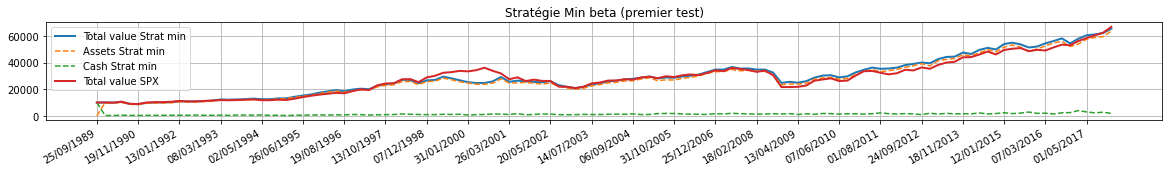

In [20]:
# Paramètres
CASH = 10000 #dollars : cash de départ.
FREQ = 60 #days : fréquence de rebalancement en jours.
STRAT = "min" #min ou max : stratégie min or max betas.

# Création portfolio et stratégie
portfolio = create_portfolio(dates, FREQ)
run_strat(df, portfolio, CASH, STRAT)
portfolio_spx = create_portfolio(dates, FREQ, True)
run_strat_spx(df, portfolio_spx, CASH)

# Plot du PNL
show_portfolio(portfolio, hide=False, name = f"Strat {STRAT}", title="Stratégie Min beta (premier test)")
show_portfolio(portfolio_spx, hide=True, name = "SPX")
plt.grid()

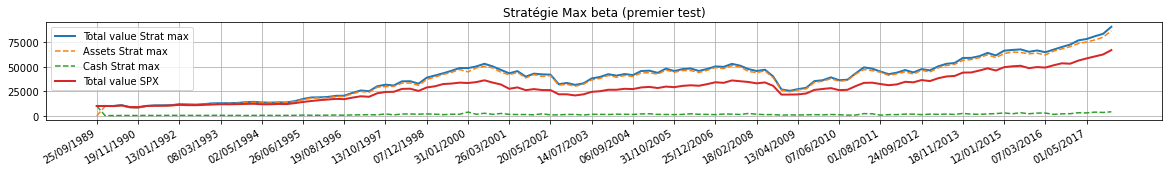

In [21]:
# Paramètres
CASH = 10000 #dollars : cash de départ.
FREQ = 60 #days : fréquence de rebalancement en jours.
STRAT = "max" #min ou max : stratégie min or max betas.

# Création portfolio et stratégie
portfolio = create_portfolio(dates, FREQ)
run_strat(df, portfolio, CASH, STRAT)
portfolio_spx = create_portfolio(dates, FREQ, True)
run_strat_spx(df, portfolio_spx, CASH)

# Plot du PNL
show_portfolio(portfolio, hide=False, name = f"Strat {STRAT}", title="Stratégie Max beta (premier test)")
show_portfolio(portfolio_spx, hide=True, name = "SPX")
plt.grid()

On écrit une fonction rapide pour visualiser la comparaison des portfeuille des deux stratégies avec le SPX.

In [22]:
def show_comparaison(min_portfolio, max_portfolio, spx_portfolio) :
    fig, axs = plt.subplots(1, 2, figsize=(20, 6))
    fig.suptitle(f"Strating cash : {CASH}$ \n Rebalance every {FREQ} days", fontsize=15)
    plt.axes(axs[0])
    show_portfolio(min_portfolio, hide=False, name = "Strat MIN", title="Stratégie MIN Beta")
    show_portfolio(spx_portfolio, hide=True, name = "SPX")
    plt.grid()
    plt.axes(axs[1])
    show_portfolio(max_portfolio, hide=False, name = "Strat MAX", title="Stratégie MAX Beta")
    show_portfolio(spx_portfolio, hide=True, name = "SPX")
    plt.grid()

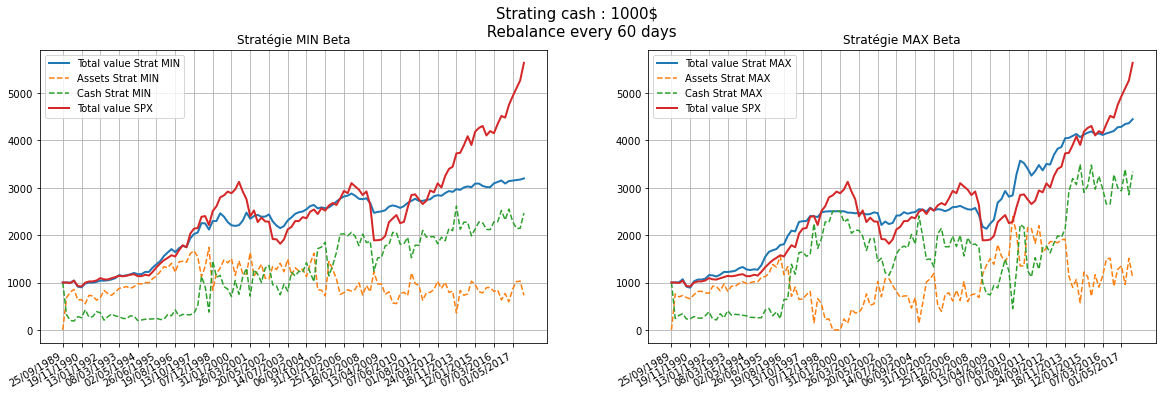

In [23]:
# Paramètres
CASH = 1000 #dollars : cash de départ.
FREQ = 60 #days : fréquence de rebalancement en jours.

# MIN strategy
portfolio_min = create_portfolio(dates, FREQ)
run_strat(df, portfolio_min, CASH, "min")

# MAX strategy
portfolio_max = create_portfolio(dates, FREQ)
run_strat(df, portfolio_max, CASH, "max")

# SPX strategy
portfolio_spx = create_portfolio(dates, FREQ, True)
run_strat_spx(df, portfolio_spx, CASH)

# PNL
show_comparaison(portfolio_min, portfolio_max, portfolio_spx)

**Commentaires :** Pour un rebalancement tous les 60 jours (environ 3 mois de trading) et un 1000$ pour commencer, on voit que les deux strategies sont plutot proches du SPX, et qu'au final on, elles ne battent pas le SPX en 2018.

On change de paramètres :

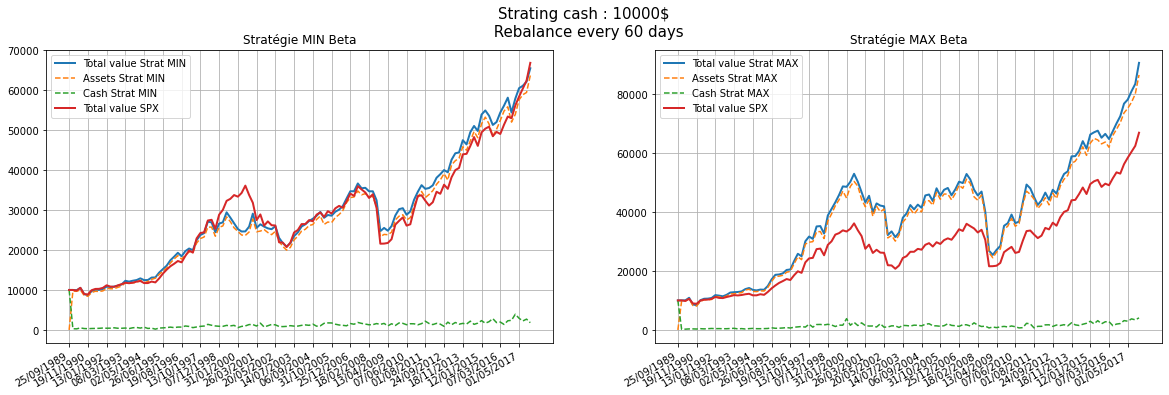

In [24]:
# Paramètres
CASH = 10000 #dollars : cash de départ.
FREQ = 60 #days : fréquence de rebalancement en jours.

# MIN strategy
portfolio_min = create_portfolio(dates, FREQ)
run_strat(df, portfolio_min, CASH, "min")

# MAX strategy
portfolio_max = create_portfolio(dates, FREQ)
run_strat(df, portfolio_max, CASH, "max")

# SPX strategy
portfolio_spx = create_portfolio(dates, FREQ, True)
run_strat_spx(df, portfolio_spx, CASH)

# PNL
show_comparaison(portfolio_min, portfolio_max, portfolio_spx)

**Commentaires** : On observe qu'avec 10 000$ pour commencer, la strategie MAX betas arrive a surperformer le SPX, tandis que le min betas lui fait environ pareil que le SPX.

In [25]:
# Conversion en fichier Excel pour facilement voir les allocations et les deltas de chaque indices.
portfolio_min.to_excel('min_betas.xlsx')
portfolio_max.to_excel('max_betas.xlsx')
portfolio_spx.to_excel('spx_portfolio.xlsx')

On change de paramètres :

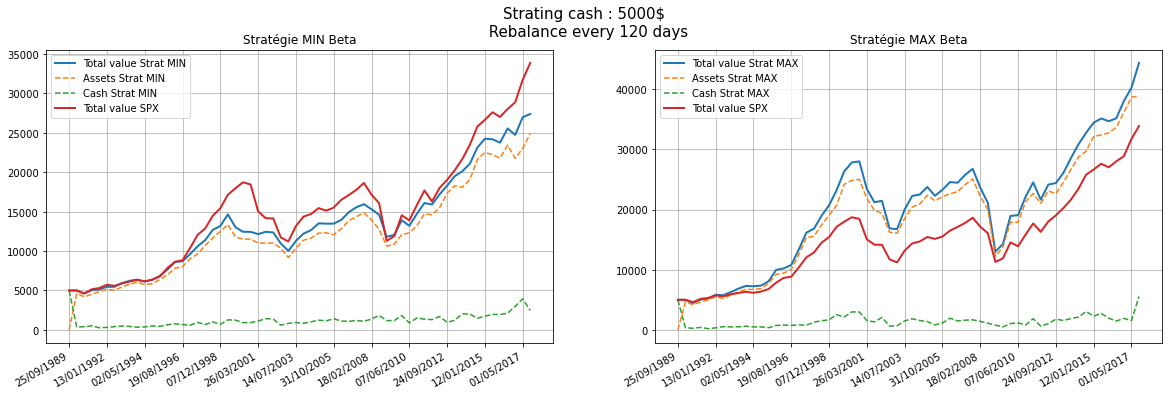

In [26]:
# Paramètres
CASH = 5000 #dollars : cash de départ.
FREQ = 120 #days : fréquence de rebalancement en jours.

# MIN strategy
portfolio_min = create_portfolio(dates, FREQ)
run_strat(df, portfolio_min, CASH, "min")

# MAX strategy
portfolio_max = create_portfolio(dates, FREQ)
run_strat(df, portfolio_max, CASH, "max")

# SPX strategy
portfolio_spx = create_portfolio(dates, FREQ, True)
run_strat_spx(df, portfolio_spx, CASH)

# PNL
show_comparaison(portfolio_min, portfolio_max, portfolio_spx)

**Commentaires :** Cette fois, on rebalance le portfeuille tous les 120 jours et on commence avec 5000$. La stratégie MAX betas semble prendre le dessus sur l'autre strategie et arrive à battre le SPX.